In [1]:
!pip install mofapy2 mofax h5py

In [2]:
import pandas as pd
from mofapy2.run.entry_point import entry_point

In [3]:
# Base URL for data download
base_url = "https://raw.githubusercontent.com/WanbingZeng/OMINEX/main/data/"

In [37]:
x1 = pd.read_csv(base_url + "COREAD_gex.csv", index_col=0).T
x2 = pd.read_csv(base_url + "COREAD_mu.csv", index_col=0).T
x2[x2 > 0] = 1  # Binarization
x3 = pd.read_csv(base_url + "COREAD_cn.csv", index_col=0).T
covariates = pd.read_csv(base_url+"COREAD_subtypes.csv", index_col=0, header=0)
covariates=covariates[['subtypes']]

In [38]:
x1

,RNF113A,S100A13,AP3D1,ATP6V1G1,UBQLN4,TPPP3,TSSC4,FOS,ERBB3,CHRAC1,...,CLSTN1,TMEM98,ENOPH1,NOTCH3,HIST1H4C,PLOD1,KIFC1,GNG4,SMIM30,PLPP2
Case1,21.195670,19.726005,11.530217,0.000000,15.356366,12.767472,0.000000,16.489747,17.708855,16.056793,...,21.808384,16.919395,16.402046,16.036894,16.549966,18.373326,16.549827,18.765078,16.932423,15.615291
Case2,21.508658,18.657292,12.988300,14.126750,19.622082,0.000000,0.000000,21.274977,18.115900,12.230063,...,22.529812,19.056564,18.207457,0.000000,19.552257,17.017828,15.357553,15.658792,15.977293,15.185182
Case3,20.080716,18.970339,10.837587,15.313250,0.000000,0.000000,22.374816,0.000000,19.785306,11.779289,...,21.642433,18.559744,15.417365,11.759395,17.047553,16.332485,19.223665,17.712799,17.595020,15.639959
Case4,0.000000,11.883356,10.242480,19.792995,0.000000,0.000000,0.000000,13.031538,0.000000,0.000000,...,11.739006,18.352290,16.249263,12.971004,16.414379,18.558028,16.222916,19.256511,13.663508,16.101776
Case5,0.000000,12.077533,0.000000,0.000000,0.000000,0.000000,11.077866,0.000000,0.000000,0.000000,...,0.000000,18.930303,16.912966,12.679842,17.950233,18.953197,16.699535,19.018383,16.277123,15.351156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Case117,11.673601,0.000000,0.000000,0.000000,13.527430,0.000000,16.734721,11.906196,11.835825,10.059176,...,11.613499,14.717214,14.195925,16.497371,17.007356,19.990074,18.081018,16.589956,12.700718,12.879539
Case118,11.717598,0.000000,0.000000,20.580360,11.986711,0.000000,14.445359,11.950195,11.879824,11.102489,...,11.657495,19.082116,16.783186,16.491340,18.708697,17.893169,16.506832,17.882752,15.825745,16.221057
Case119,0.000000,13.146131,14.633627,18.139138,0.000000,14.063835,18.105979,12.294651,0.000000,12.768502,...,13.001758,17.433537,16.981739,13.596509,17.932108,16.104134,15.757595,18.764311,14.789536,13.852952
Case120,13.003646,0.000000,19.870922,0.000000,0.000000,0.000000,15.360792,12.651393,12.581015,10.803979,...,12.358662,15.309447,17.466296,13.483838,20.450992,18.700134,14.663050,18.086688,18.072638,13.914297


In [39]:
# Prepare data list
views = ["COREAD_gex", "COREAD_mu", "COREAD_cn"]
groups = ["all_samples"]  # Assuming all data is in one unified group

# Create nested list structure for MOFA
data = [[None] for _ in views]
data[0][0] = x1.values  # Data for the first view
data[1][0] = x2.values  # Data for the second view
data[2][0] = x3.values  # Data for the third view

In [40]:
# Initialize MOFA entry point
ent = entry_point()

# Set data matrix
ent.set_data_matrix(data)

# Set model options
ent.set_model_options(
    factors=2,  # Extract two principal components
    spikeslab_weights=True,
    ard_weights=True
)

# Set training options
ent.set_train_options(
    iter=1000, 
    convergence_mode="slow",
    dropR2=None,
    gpu_mode=False,
    seed=42
)

# Build the model
ent.build()

# Run the model
ent.run()

# Extract factor values
factors = ent.model.nodes["Z"].getExpectation()

# Output factor results
print("Factor 1:", factors[0])
print("Factor 2:", factors[1])

# Save the model
outfile = "/path/to/your/output.hdf5"
ent.save(outfile, save_data=True)

# End script
print("MOFA+ model training complete and results saved.")



        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
View names not provided, using default naming convention:
- view1, view2, ..., viewM

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group

Iteration 78: time=0.01, ELBO=-175703.12, deltaELBO=0.672 (0.00010188%), Factors=2
Iteration 79: time=0.00, ELBO=-175702.46, deltaELBO=0.651 (0.00009876%), Factors=2
Iteration 80: time=0.02, ELBO=-175701.83, deltaELBO=0.632 (0.00009577%), Factors=2
Iteration 81: time=0.01, ELBO=-175701.22, deltaELBO=0.613 (0.00009290%), Factors=2
Iteration 82: time=0.00, ELBO=-175700.62, deltaELBO=0.595 (0.00009014%), Factors=2
Iteration 83: time=0.01, ELBO=-175700.05, deltaELBO=0.577 (0.00008750%), Factors=2
Iteration 84: time=0.01, ELBO=-175699.49, deltaELBO=0.560 (0.00008496%), Factors=2
Iteration 85: time=0.01, ELBO=-175698.94, deltaELBO=0.544 (0.00008252%), Factors=2
Iteration 86: time=0.01, ELBO=-175698.41, deltaELBO=0.529 (0.00008017%), Factors=2
Iteration 87: time=0.01, ELBO=-175697.90, deltaELBO=0.514 (0.00007791%), Factors=2
Iteration 88: time=0.00, ELBO=-175697.40, deltaELBO=0.500 (0.00007574%), Factors=2
Iteration 89: time=0.01, ELBO=-175696.92, deltaELBO=0.486 (0.00007364%), Factors=2
Iter

Iteration 176: time=0.01, ELBO=-175679.35, deltaELBO=0.074 (0.00001122%), Factors=2
Iteration 177: time=0.01, ELBO=-175679.28, deltaELBO=0.073 (0.00001102%), Factors=2
Iteration 178: time=0.01, ELBO=-175679.21, deltaELBO=0.071 (0.00001083%), Factors=2
Iteration 179: time=0.01, ELBO=-175679.14, deltaELBO=0.070 (0.00001064%), Factors=2
Iteration 180: time=0.01, ELBO=-175679.07, deltaELBO=0.069 (0.00001046%), Factors=2
Iteration 181: time=0.01, ELBO=-175679.00, deltaELBO=0.068 (0.00001028%), Factors=2
Iteration 182: time=0.00, ELBO=-175678.94, deltaELBO=0.067 (0.00001010%), Factors=2
Iteration 183: time=0.01, ELBO=-175678.87, deltaELBO=0.065 (0.00000993%), Factors=2
Iteration 184: time=0.01, ELBO=-175678.81, deltaELBO=0.064 (0.00000976%), Factors=2
Iteration 185: time=0.01, ELBO=-175678.74, deltaELBO=0.063 (0.00000959%), Factors=2
Iteration 186: time=0.01, ELBO=-175678.68, deltaELBO=0.062 (0.00000943%), Factors=2
Iteration 187: time=0.01, ELBO=-175678.62, deltaELBO=0.061 (0.00000927%), Fa

In [7]:
#factors

In [41]:
df_factors = pd.DataFrame(factors, index=x1.index, columns=['Factor 1', 'Factor 2'])# create a dataframe for factors
df_factors

,Factor 1,Factor 2
Case1,-0.191605,-1.169657
Case2,-0.481394,-1.048910
Case3,-0.646524,-0.712850
Case4,-0.478912,-0.217597
Case5,0.636579,-0.403172
...,...,...
Case117,-1.060382,1.612498
Case118,-0.086467,0.625262
Case119,-0.829916,0.238907
Case120,-0.379890,-1.828011


In [42]:
df_factors_subtype=pd.concat([df_factors, covariates],axis=1)
df_factors_subtype

,Factor 1,Factor 2,subtypes
Case1,-0.191605,-1.169657,CMS1
Case2,-0.481394,-1.048910,CMS1
Case3,-0.646524,-0.712850,CMS1
Case4,-0.478912,-0.217597,CMS1
Case5,0.636579,-0.403172,CMS1
...,...,...,...
Case117,-1.060382,1.612498,CMS3
Case118,-0.086467,0.625262,CMS3
Case119,-0.829916,0.238907,CMS3
Case120,-0.379890,-1.828011,CMS1


In [10]:
# Visualisasion

Scatter Plot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

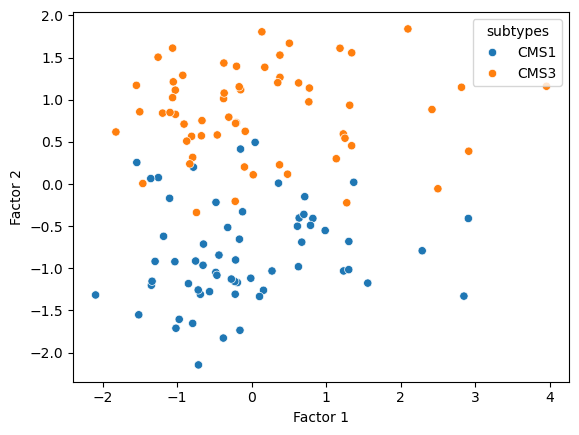

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter Plot
sns.scatterplot(data=df_factors_subtype, x="Factor 1", y="Factor 2", hue="subtypes")
plt.show()

Seaborn:https://seaborn.pydata.org/generated/seaborn.clustermap.html

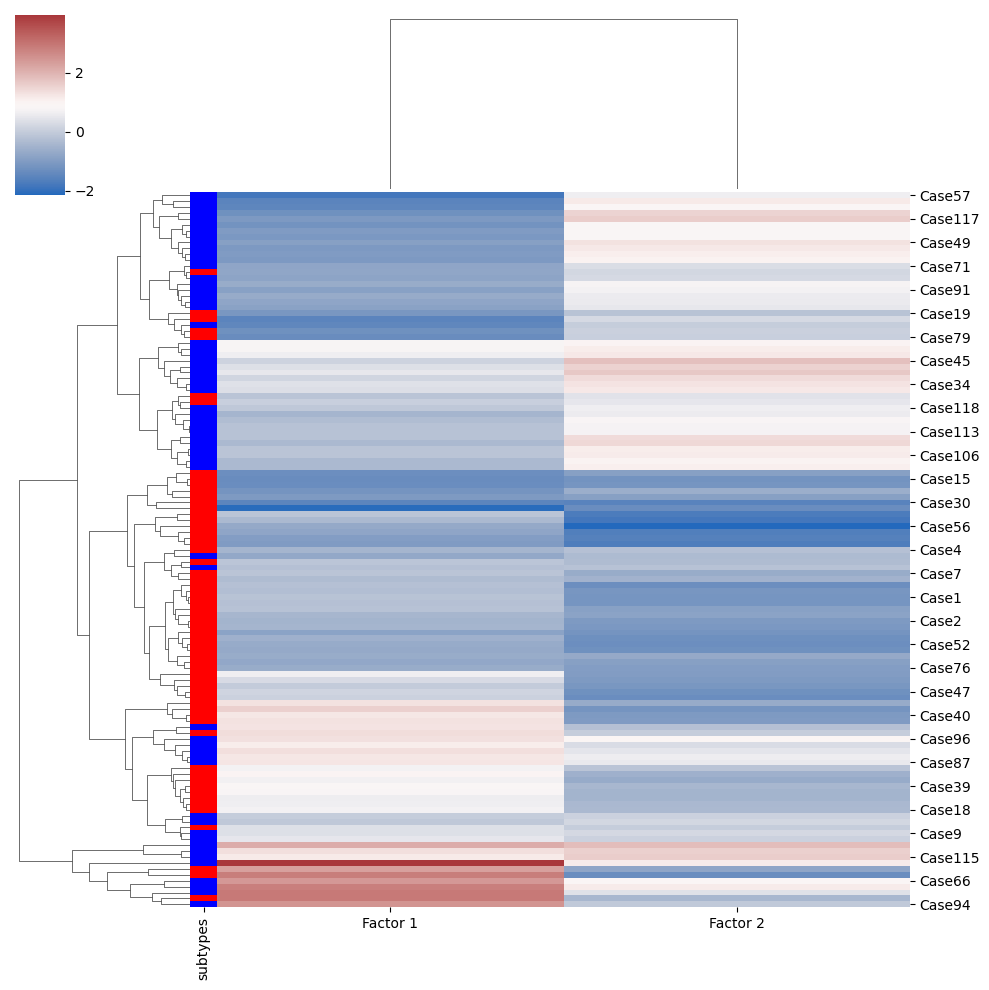

In [45]:
#import seaborn as sns
#import matplotlib.pyplot as plt
# Add colors to the subtypes and map them to the samples.
subtype_colors = {'CMS1': 'red', 'CMS3': 'blue'}
row_colors =covariates['subtypes'].map(subtype_colors)
sns.clustermap(df_factors, metric="euclidean", method="average", cmap="vlag",row_colors=row_colors)
plt.show()

## Exercise 1
Use the data from the same URL, which is the `BRCA` dataset, to perform MOFA+ analysis, identify the factors, and visualize the results.

## Exercise2
Can you incorporate any **methods** like feature selection to enhance factor analysis for better classification?